In [80]:
from pycbc import conversions as con
import h5py
import numpy as np

In [81]:
f = h5py.File('/work/sumit.kumar/3ogc/pe/pe_runs/3ogc_loud_events/bbh/inference_gw_190725_high_flow_alldet_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW190725_172728_H1_FLOW_41HZ_IMRPHENOMXPHM-1126259200-400.hdf')

In [82]:
f.attrs.keys()

<KeysViewHDF5 ['H1_analysis_segment', 'H1_likelihood_low_freq', 'H1_psd_segment', 'L1_analysis_segment', 'L1_likelihood_low_freq', 'L1_psd_segment', 'V1_analysis_segment', 'V1_likelihood_low_freq', 'V1_psd_segment', 'analyzed_detectors', 'approximant', 'dlog_evidence', 'f_lower', 'f_ref', 'filetype', 'log_evidence', 'model', 'remapped_params', 'run_end_time', 'run_start_time', 'sampler', 'sampling_params', 'static_params', 'trigger_time', 'variable_params']>

In [83]:
for item in f.attrs.keys():
    print(item + ":", f.attrs[item])

H1_analysis_segment: [1.24811205e+09 1.24811207e+09]
H1_likelihood_low_freq: 42.0
H1_psd_segment: [1.24811206e+09 1.24811242e+09]
L1_analysis_segment: [1.24811205e+09 1.24811207e+09]
L1_likelihood_low_freq: 42.0
L1_psd_segment: [1.24811181e+09 1.24811232e+09]
V1_analysis_segment: [1.24811205e+09 1.24811207e+09]
V1_likelihood_low_freq: 42.0
V1_psd_segment: [1.24811181e+09 1.24811232e+09]
analyzed_detectors: ['H1' 'L1' 'V1']
approximant: IMRPhenomXPHM
dlog_evidence: 0.10014461352555892
f_lower: 20.0
f_ref: 20.0
filetype: posterior_file
log_evidence: -644502.1617471838
model: marginalized_polarization
remapped_params: [['mass1_from_mchirp_q(srcmchirp,q)' 'srcmass1']
 ['mass2_from_mchirp_q(srcmchirp,q)' 'srcmass2']
 ['primary_spin(mass1_from_mchirp_q(srcmchirp,q), mass2_from_mchirp_q(srcmchirp,q), spin1_a, spin2_a)'
  'spin1_a']
 ['primary_spin(mass1_from_mchirp_q(srcmchirp,q), mass2_from_mchirp_q(srcmchirp,q), spin1_azimuthal, spin2_azimuthal)'
  'spin1_azimuthal']
 ['primary_spin(mass1_f

In [29]:
ttime = f.attrs['trigger_time']
print('trigger time is:',ttime)

logl = f['samples/loglikelihood'][:].argmax()
ra = f['samples/ra'][logl]
dec = f['samples/dec'][logl]
ttime += f['samples/delta_tc'][logl]
print('delta tc is:',f['samples/delta_tc'][logl])
print('tc is:',ttime)
print('tc of L is:',con.det_tc('L1', ra, dec, ttime))
print('ra dec are:',ra,dec)

trigger time is: 1248112066.462
delta tc is: -0.014813082199072708
tc is: 1248112066.4471867
tc of L is: 1248112066.4659948
ra dec are: 5.002655865104547 -0.09236554550152269


In [30]:
ttime = f.attrs['trigger_time']
print('trigger time is:',ttime)

logl = f['samples/loglikelihood'][f['samples/delta_tc'][:]>0].argmax()
ra = f['samples/ra'][logl]
dec = f['samples/dec'][logl]
ttime += f['samples/delta_tc'][logl]
print('delta tc is:',f['samples/delta_tc'][logl])
print('tc is:',ttime)
print('tc of L is:',con.det_tc('L1', ra, dec, ttime))
print('ra dec are:',ra,dec)

trigger time is: 1248112066.462
delta tc is: 0.020162916547269163
tc is: 1248112066.4821627
tc of L is: 1248112066.4664567
ra dec are: 1.2342981090957275 0.4723111978619506


In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [32]:
from pycbc import frame

In [48]:
print(int(ttime-100),int(ttime+100))

1248111966 1248112166


In [55]:
!gw_data_find -o L --type L1_GWOSC_O3a_4KHZ_R1 -s 1248111966 -e 1248112166

file://localhost/atlas/recent/O3a/strain.4k/frame.v1/L1/1247805440/L-L1_GWOSC_O3a_4KHZ_R1-1248108544-4096.gwf


In [60]:
data = frame.read_frame('/atlas/recent/O3a/strain.4k/frame.v1/L1/1247805440/L-L1_GWOSC_O3a_4KHZ_R1-1248108544-4096.gwf',\
                        'L1:GWOSC-4KHZ_R1_STRAIN')

In [61]:
whitened = data.whiten(4,4)

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [62]:
final=whitened.highpass_fir(15,512)

In [64]:
zoom = whitened.time_slice(ttime-1,ttime+1)

In [73]:
times, freqs, power = zoom.qtransform(.001, logfsteps=100,
                                                qrange=(10, 10),
                                                frange=(20, 512),
                                         )

/work/yifan.wang/virtualenv/3ogc/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


(20, 512)

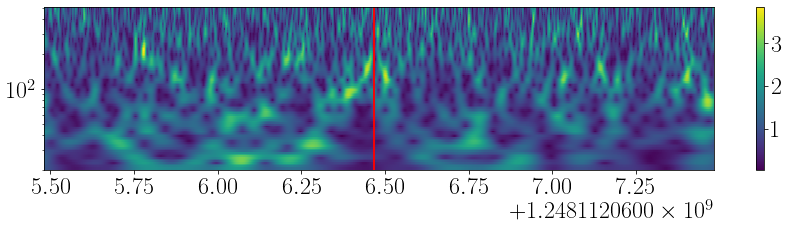

In [79]:
plt.figure(figsize=[15, 3])
plt.pcolormesh(times, freqs, power**0.5)
plt.axvline(x=1248112066.4659948,color='red')
plt.axvline(x=1248112066.4664567,color='red')
plt.xlim(ttime-1,ttime+1)
plt.colorbar()
plt.yscale('log')
plt.ylim(20,512)